In [1]:
import stdpopsim
import demes

# Get a famous human evolution model (e.g., HomSap - Out of Africa)
species = stdpopsim.get_species("HomSap")
model = species.get_demographic_model("OutOfAfrica_3G09")

# Convert to demes graph and export to YAML
graph = model.model.to_demes()
demes.dump(graph, "human_out_of_africa.yml")

loaded new alleles config:
  D in Pop_A at 45
  C in Pop_B at 30
  E in Pop_B at 40
  D in Ancestral at 80
Simulation running from generation 100 to 0...
Gen initialized: Ancestral (Size: 100)
Gen initialized: Pop_A (Size: 100)
Gen initialized: Pop_B (Size: 100)


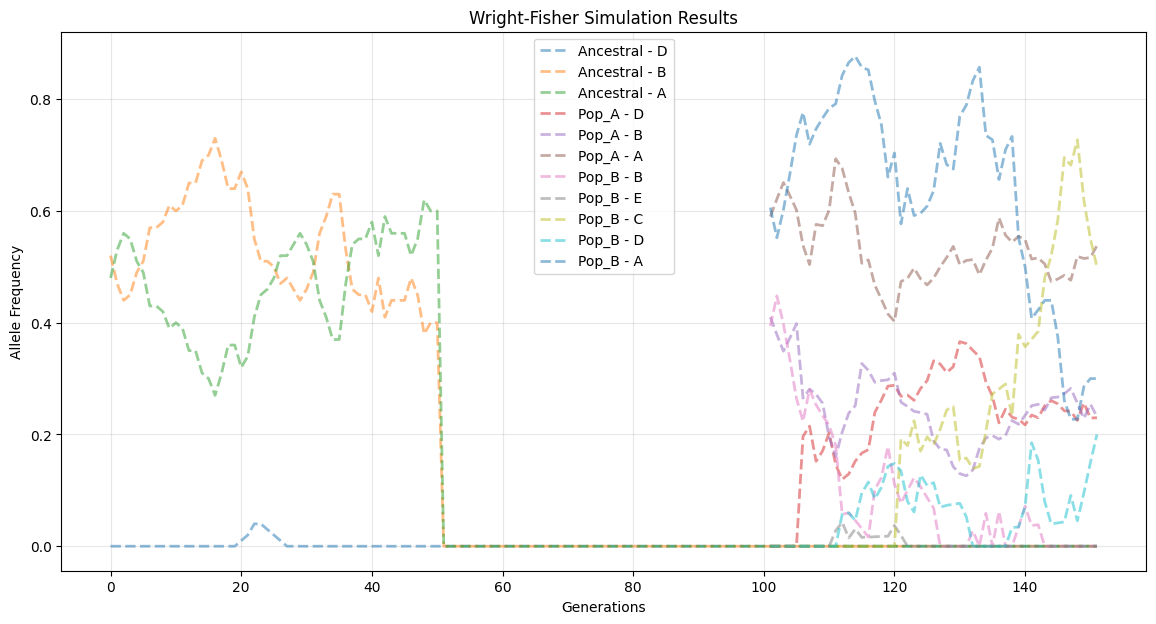

In [1]:
from simulator import WrightFisherSim
import matplotlib.pyplot as plt

# 1. Run Simulation
sim = WrightFisherSim("./deme_test.yml",config_file_path="./config_structure.yml",alleles=["A","B"], seed=42)
results = sim.run()

# 2. Setup Plot
plt.figure(figsize=(14, 7))
total_generations = max(len(v) for v in results.values())

# 3. Plot Each Population
for pop_name, frequencies in results.items():
    # Calculate x-axis alignment so all populations end at the "Present"
    start_gen = total_generations - len(frequencies)
    x_axis = range(start_gen, total_generations)
    
    alleles = set()
    for g in frequencies:
        alleles.update(g.keys())
    for allele in alleles:
        y= [g.get(allele, 0) for g in frequencies]
        plt.plot(x_axis, y, label=f"{pop_name} - {allele}", linestyle='--', alpha=0.5, linewidth=2)

# 4. Labels and Show
plt.title("Wright-Fisher Simulation Results")
plt.xlabel("Generations")
plt.ylabel("Allele Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from simulator import WrightFisherSim
import matplotlib.pyplot as plt

# 1. Run Simulation
sim = WrightFisherSim("./human_out_of_africa.yml", seed=42)
results = sim.run()

# 2. Setup Plot
plt.figure(figsize=(14, 7))
total_generations = max(len(v) for v in results.values())

# 3. Plot Each Population
for pop_name, frequencies in results.items():
    # Calculate x-axis alignment so all populations end at the "Present"
    start_gen = total_generations - len(frequencies)
    x_axis = range(start_gen, total_generations)
    
    plt.plot(x_axis, frequencies, label=pop_name, linewidth=2)

# 4. Labels and Show
plt.title("Wright-Fisher Simulation Results")
plt.xlabel("Generations")
plt.ylabel("Allele Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from evolutionary_simulator import WrightFisherSim, plot_results


sim = WrightFisherSim("deme_test.yml",seed=42)
results = sim.run()


plot_results(results)